<a href="https://colab.research.google.com/github/SprihaT/ReLU-Nonlinear-Regression/blob/main/CW28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

CPU


In [32]:
#Example of function "nn.Linear"
input = torch.tensor([[1.0,2.0,3.0]]) # 1x3 matrix
print(input)

m =nn.Linear(3,2) # Y = X x^t +b  (w^t is 'transposed' to multiply with X properly)
print(m.weight)
print(m.bias)
output = m(input)
print(output)

tensor([[1., 2., 3.]])
Parameter containing:
tensor([[-0.1358,  0.5415,  0.2754],
        [ 0.2842,  0.5374,  0.4393]], requires_grad=True)
Parameter containing:
tensor([0.4449, 0.4670], requires_grad=True)
tensor([[2.2181, 3.1439]], grad_fn=<AddmmBackward0>)


In [33]:
X = torch.tensor([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]], dtype=torch.float32)
Y = torch.tensor([[10], [10], [10], [10], [8], [6], [4], [3], [0], [0], [0], [0], [2], [4], [6], [8], [10], [10], [10], [10], [10]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples: {n_samples}, n_features: {n_features}')

X_test = torch.tensor([[10.5]], dtype=torch.float32)
Y_test = torch.tensor([[5]], dtype=torch.float32)

n_samples: 21, n_features: 1


In [34]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.input_layer = nn.Linear(1, 6) # Y = X w^t + b
        self.hidden1 = nn.Linear(6, 6)
        self.hidden2 = nn.Linear(6, 6)
        self.hidden3 = nn.Linear(6, 6)
        self.output_layer = nn.Linear(6, 1)

    def forward(self, data):
        data = F.relu(self.input_layer(data))
        data = F.relu(self.hidden1(data))
        data = F.relu(self.hidden2(data))
        data = F.relu(self.hidden3(data))
        data = self.output_layer(data)
        return data

# Input size, output size = n_features, n_features
LRmodel = LinearRegression(1, 1)
print(f'Prediction before training: f({X_test.item()}) = {LRmodel(X_test).item():.3f}')

Prediction before training: f(10.5) = 0.252


In [35]:
learning_rate = 0.01 # Slope = rise/run. Learning rate is "run" in slope.
cost = nn.MSELoss() # Mean Square Error Loss function or cost function
optimizer = torch.optim.Adam(LRmodel.parameters(), lr=learning_rate) # SGD: Stochastic Gradient Descent

n_epochs = 10000 # Calculate w and b 100000 times
for epoch in range(n_epochs):
    y_predicted = LRmodel(X)
    loss = cost(y_predicted, Y)

    loss.backward() # Calculate slope of cost function (gradients)
    optimizer.step() # Update weights using gradient descent
    optimizer.zero_grad() # Reset gradients for next iteration

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch}/{n_epochs}], Loss: {loss.item():.8f}')

print(f'Prediction after training: f({X_test.item()}) = {LRmodel(X_test).item():.3f}')

Epoch [0/10000], Loss: 51.54125214
Epoch [1000/10000], Loss: 0.03445602
Epoch [2000/10000], Loss: 0.03369036
Epoch [3000/10000], Loss: 0.04056411
Epoch [4000/10000], Loss: 0.03371299
Epoch [5000/10000], Loss: 0.03356020
Epoch [6000/10000], Loss: 0.03356016
Epoch [7000/10000], Loss: 0.03362913
Epoch [8000/10000], Loss: 0.03986137
Epoch [9000/10000], Loss: 0.03365018
Prediction after training: f(10.5) = -0.000


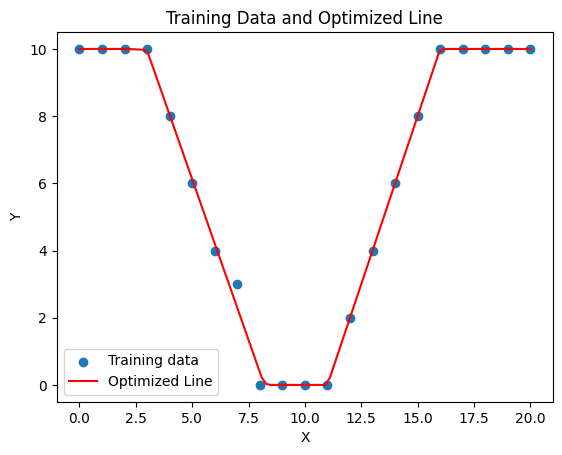

In [36]:
# prompt: plot the graph of my training data and draw a line using the weights and biases from my optimized data

import matplotlib.pyplot as plt

# Assuming you have your trained model (LRmodel) and your data (X, Y)
# Get the weights and biases from the model
weights = LRmodel.output_layer.weight.detach().numpy()
bias = LRmodel.output_layer.bias.detach().numpy()

# Create a line using the weights and bias
line_x = torch.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y = LRmodel(line_x).detach().numpy()


# Plot the data and line
plt.scatter(X.numpy(), Y.numpy(), label='Training data')
plt.plot(line_x.numpy(), line_y, color='red', label='Optimized Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Training Data and Optimized Line')
plt.show()
